In [ ]:
pip install isodate

In [ ]:
import pandas as pd
import numpy as np
import isodate
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.ndimage import gaussian_filter1d

In [ ]:
youtube_data_cleaned = pd.read_csv('/content/youtube_data_cleaned.csv')

# Histograms

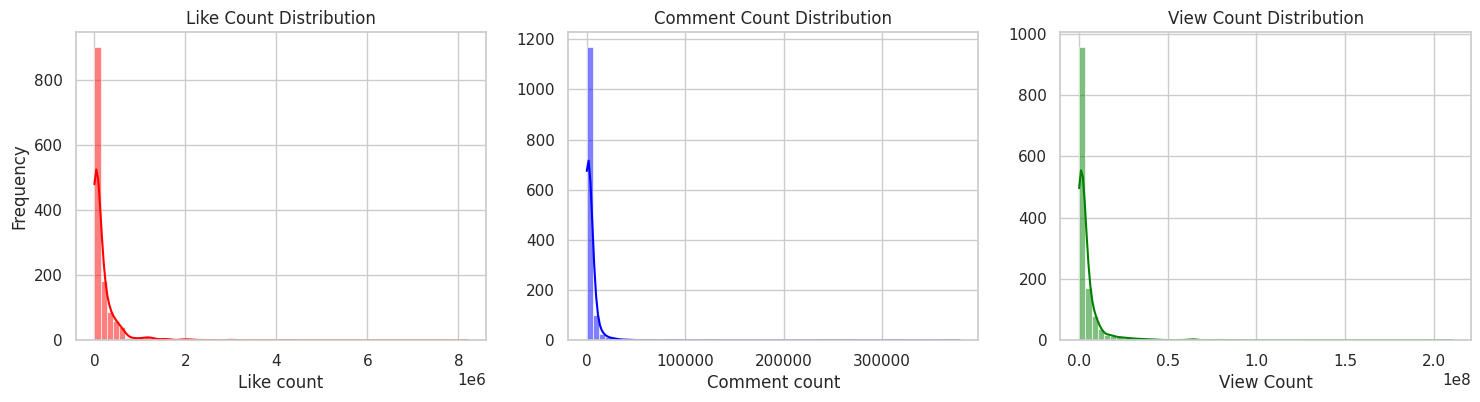

In [ ]:
sns.set(style = 'whitegrid')
fig, axes = plt.subplots(1,3, figsize=(18,4))

sns.histplot(youtube_data_cleaned['like_count'], bins = 60,kde = True, color = 'red', ax = axes[0])
axes[0].set_title('Like Count Distribution')
axes[0].set_xlabel('Like count')
axes[0].set_ylabel('Frequency')

sns.histplot(youtube_data_cleaned['comment_count'],  bins = 60, kde = True,color = 'blue', ax =axes[1])
axes[1].set_title('Comment Count Distribution')
axes[1].set_xlabel('Comment count')
axes[1].set_ylabel('  ')


sns.histplot(youtube_data_cleaned['view_count'],  bins = 60, kde = True,color = 'green', ax = axes[2])
axes[2].set_title('View Count Distribution')
axes[2].set_xlabel('View Count')
axes[2].set_ylabel('  ')

plt.show()


The histograms for like counts, comment counts, and view counts all display a right-skewed distribution. This indicates that videos with high levels of interaction are relatively rare, while the majority of videos receive lower interaction counts.

# Correlation Matrix

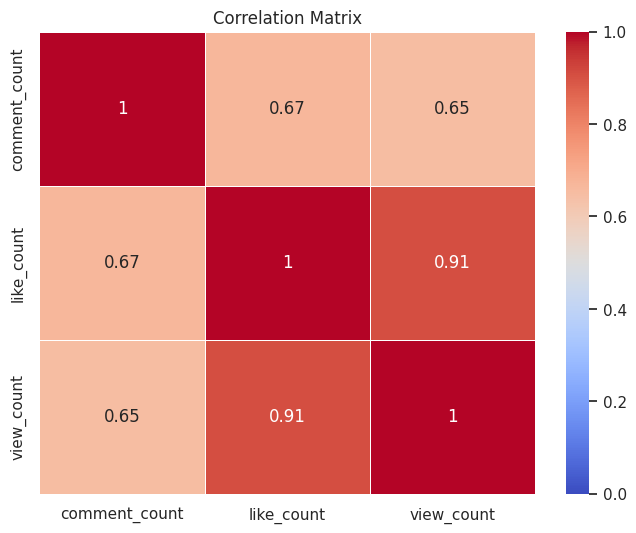

In [ ]:
# Determine the correlation between variables
correlation = youtube_data_cleaned[['comment_count','like_count','view_count']].corr()

plt.figure(figsize=(8,6))
sns.heatmap(correlation, annot=True, cmap="coolwarm", linewidths=0.5, vmin=0, vmax=1)
plt.title("Correlation Matrix")
plt.show()

The correlation matrix reveals a very strong and positive relationship between the number of views and the number of likes. As the number of views increases, the number of likes also tends to increase accordingly.

However, the correlation between views and comments is weaker, indicating that while the number of comments also tends to rise with an increase in views, this relationship is not as strong as with likes. A similar pattern is observed between likes and comments.

# Analysis based on category


<ipython-input-9-1fe97d020926>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.values, y=category_counts.index, palette='viridis')


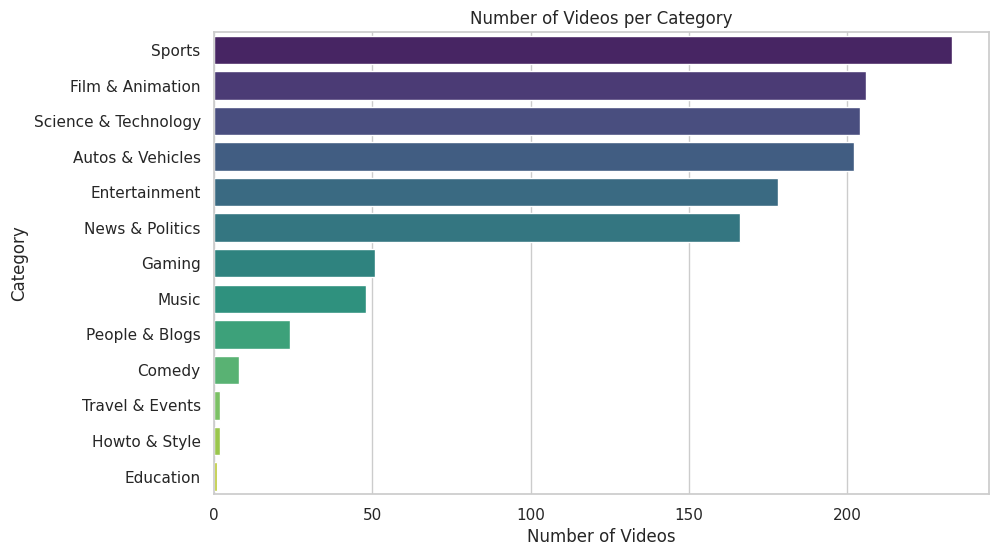

In [ ]:
category_counts = youtube_data_cleaned['category'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.values, y=category_counts.index, palette='viridis')
plt.title('Number of Videos per Category')
plt.xlabel('Number of Videos')
plt.ylabel('Category')

plt.show()

Categories such as Sports, Film & Animation, Science & Technology, Autos & Vehicles, Entertainment, and News & Politics have a significantly larger number of videos compared to other categories. These categories tend to be more accessible to viewers, which is why they are often produced and uploaded more frequently.


<ipython-input-10-11fffb89796f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=category_engagement.index, x=category_engagement['view_count'], ax=axes[0], palette='viridis')
<ipython-input-10-11fffb89796f>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=category_engagement.index, x=category_engagement['like_count'], ax=axes[1], palette='viridis')
<ipython-input-10-11fffb89796f>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=category_engagement.index, x=category_engagement['comment_count'], ax=axes[2], palette='viridis')


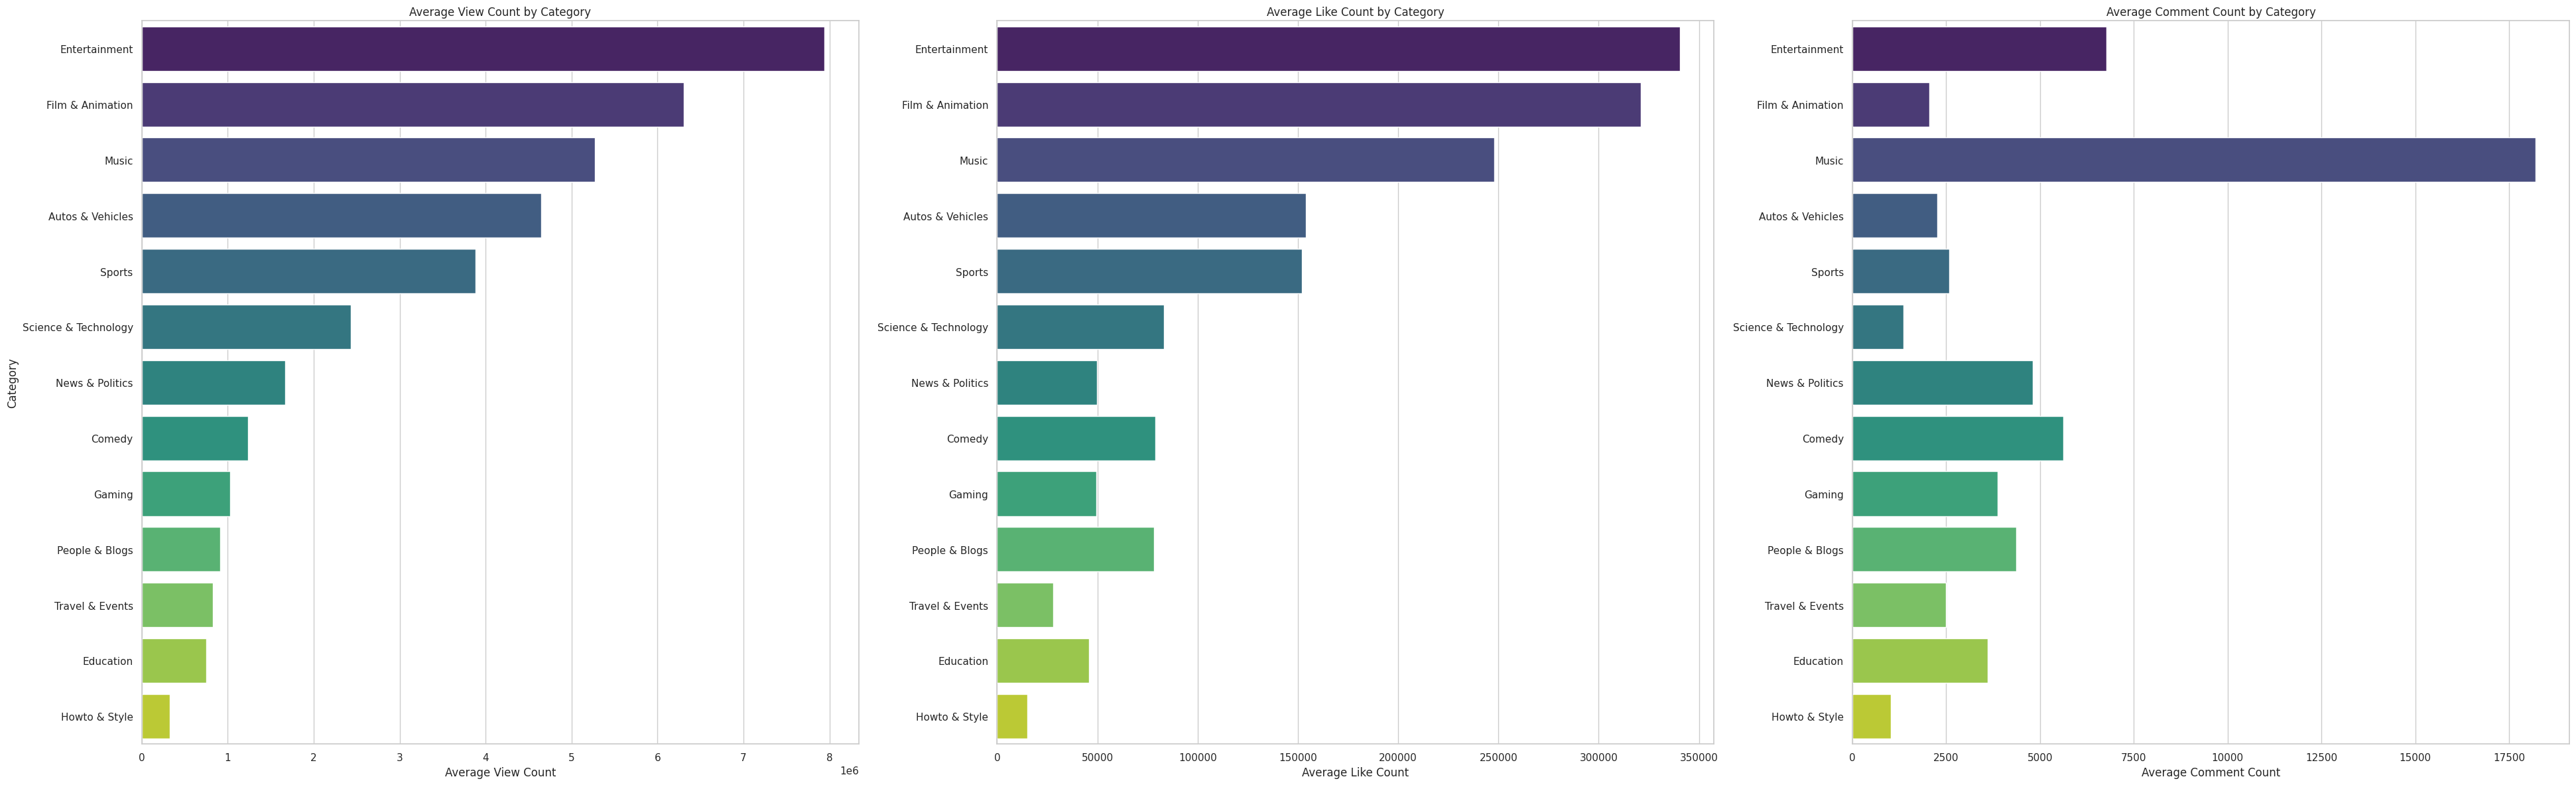

In [ ]:
# average engagement metrics by category
category_engagement = youtube_data_cleaned.groupby('category')[['view_count', 'like_count', 'comment_count']].mean().sort_values(by='view_count', ascending=False)

fig, axes = plt.subplots(1, 3, figsize=(39, 12))

sns.barplot(y=category_engagement.index, x=category_engagement['view_count'], ax=axes[0], palette='viridis')
axes[0].set_title('Average View Count by Category')
axes[0].set_xlabel('Average View Count')
axes[0].set_ylabel('Category')

sns.barplot(y=category_engagement.index, x=category_engagement['like_count'], ax=axes[1], palette='viridis')
axes[1].set_title('Average Like Count by Category')
axes[1].set_xlabel('Average Like Count')
axes[1].set_ylabel('')

sns.barplot(y=category_engagement.index, x=category_engagement['comment_count'], ax=axes[2], palette='viridis')
axes[2].set_title('Average Comment Count by Category')
axes[2].set_xlabel('Average Comment Count')
axes[2].set_ylabel('')

plt.tight_layout()
plt.show()

The Entertainment, Film & Animation, and Music categories have the highest average view counts and average likes. Although the Music category ranks third in both average views and average likes, it has the highest average number of comments among all categories.



# Analysis based on duration

In [ ]:
# convert ISO 8601 duration to seconds
youtube_data_cleaned['duration_seconds'] = youtube_data_cleaned['duration'].apply(lambda x: isodate.parse_duration(x).total_seconds())
youtube_data_cleaned['duration_range'] = pd.cut(youtube_data_cleaned['duration_seconds'], bins=[0, 300, 600, 1200, 3600, 7200, 86400], labels=['0-5 min', '5-10 min', '10-20 min', '20-60 min', '60-120 min', '> 120 min'])

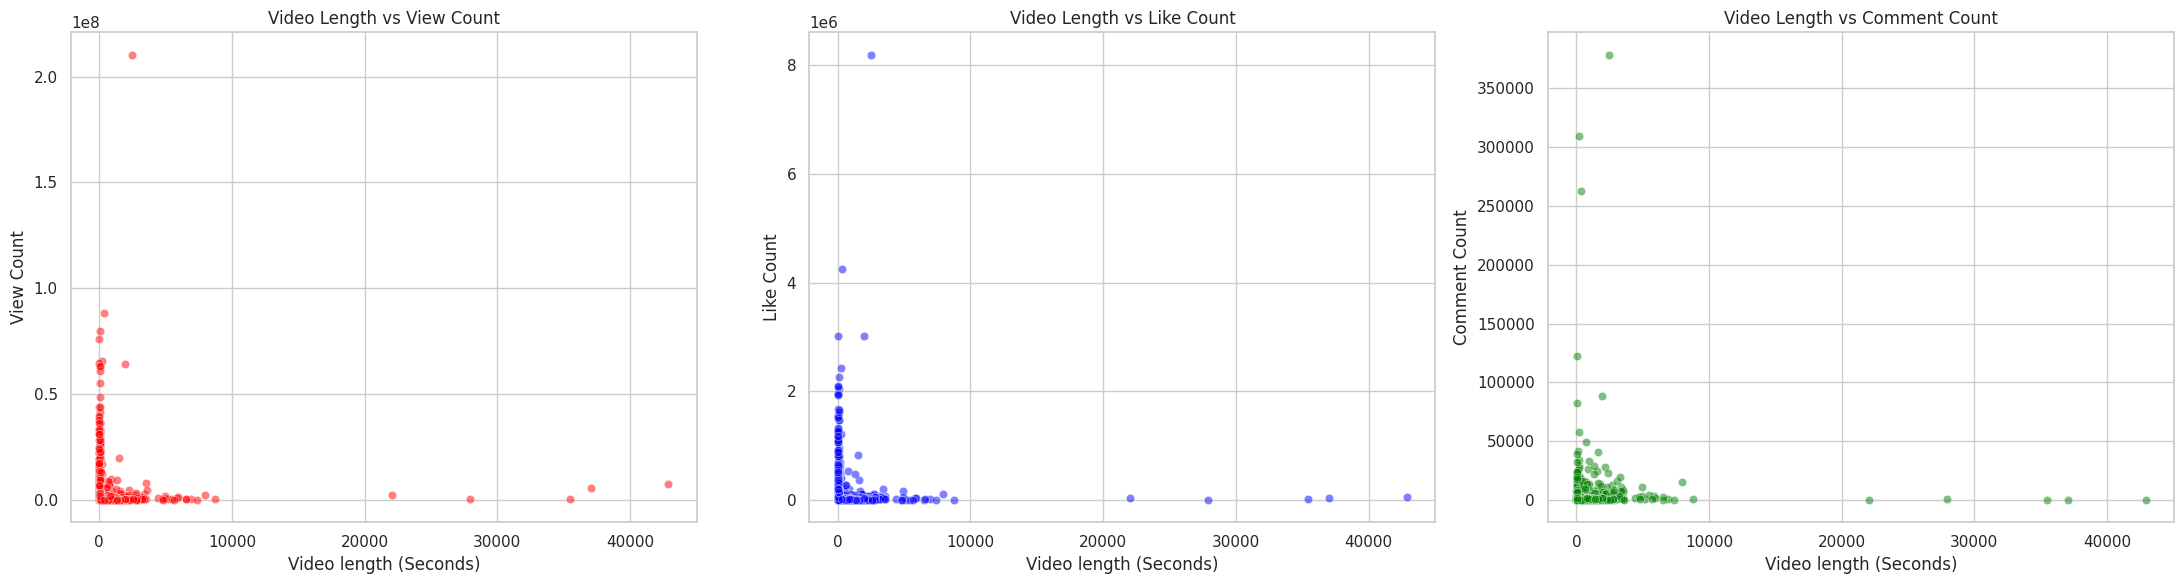

In [ ]:
# scatter plot for video length vs view count
fig, axes = plt.subplots(1,3, figsize = (22,6))

sns.scatterplot(x='duration_seconds', y='view_count', data=youtube_data_cleaned, alpha=0.5, color='red', ax =axes[0])
axes[0].set_title('Video Length vs View Count')
axes[0].set_xlabel('Video length (Seconds)')
axes[0].set_ylabel('View Count')

sns.scatterplot(x='duration_seconds', y = 'like_count', data = youtube_data_cleaned, alpha = 0.5, color ='blue', ax = axes[1])
axes[1].set_title('Video Length vs Like Count')
axes[1].set_xlabel('Video length (Seconds)')
axes[1].set_ylabel('Like Count')

sns.scatterplot(x='duration_seconds', y ='comment_count', data = youtube_data_cleaned, alpha =0.5, color = 'green', ax = axes[2])
axes[2].set_title('Video Length vs Comment Count')
axes[2].set_xlabel('Video length (Seconds)')
axes[2].set_ylabel('Comment Count')

plt.tight_layout()
plt.show()

The scatter plot reveals that shorter videos tend to have higher view counts and greater engagement. There are very few long-duration videos that achieve high levels of interaction.

<ipython-input-13-add84064867b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'duration_range', data = youtube_data_cleaned, palette = 'coolwarm', width = 0.4)


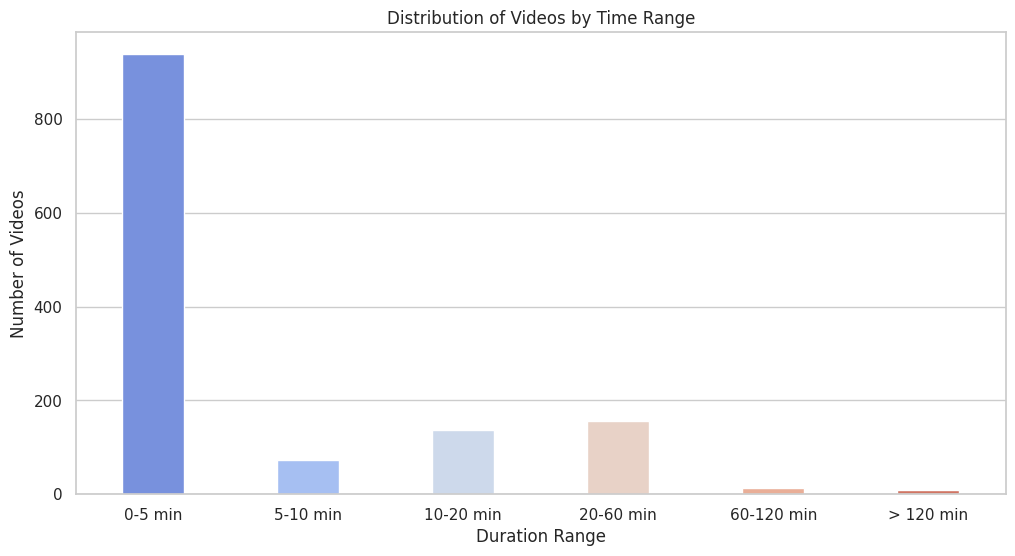

Text(0, 0.5, 'Like Count')

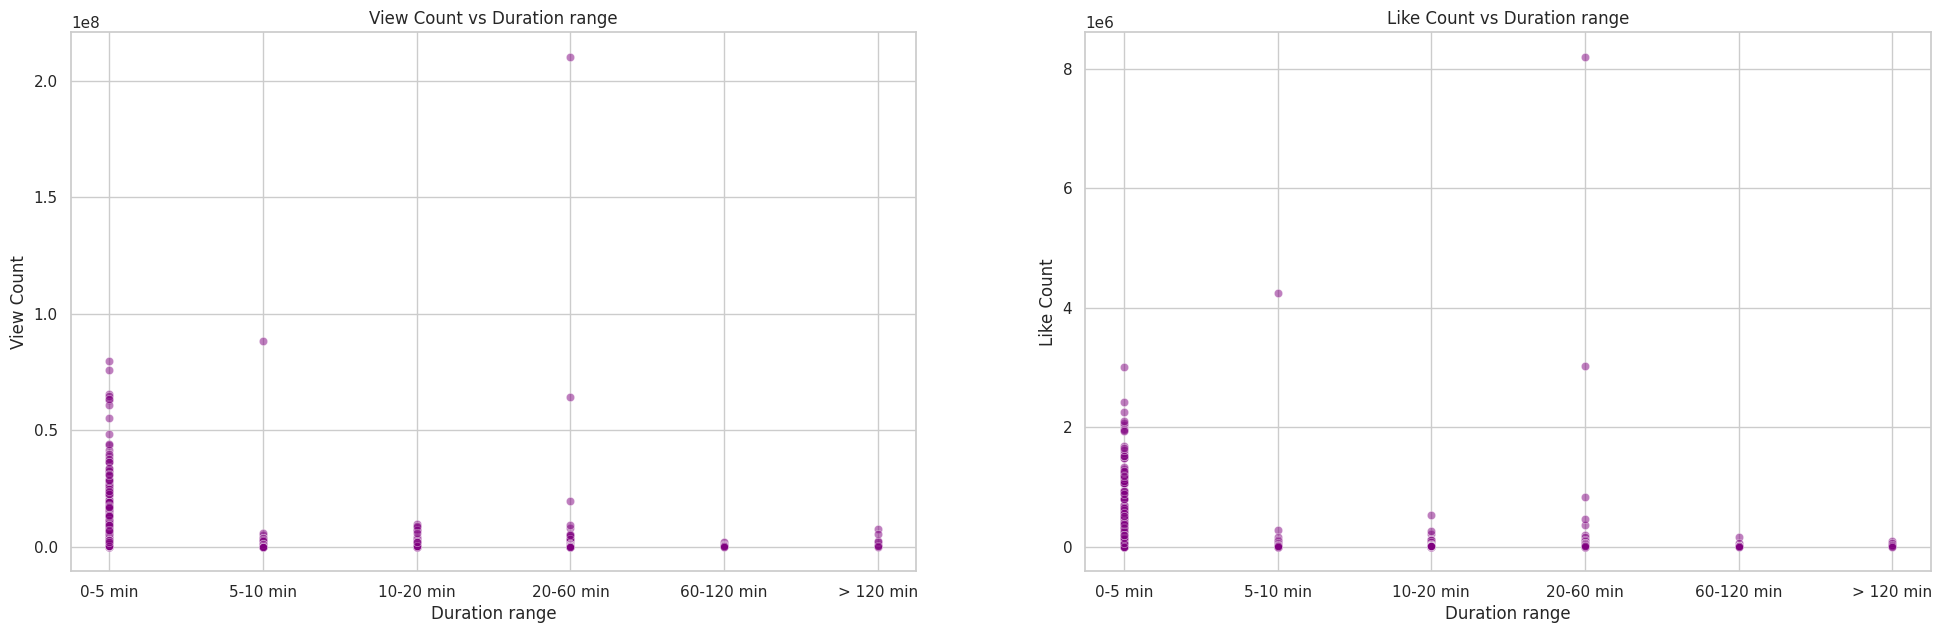

In [ ]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'duration_range', data = youtube_data_cleaned, palette = 'coolwarm', width = 0.4)
plt.title('Distribution of Videos by Time Range')
plt.xlabel('Duration Range')
plt.ylabel('Number of Videos')
plt.show()

fig, axes = plt.subplots(1,2,figsize = (24,7))
sns.scatterplot(x = 'duration_range', y = 'view_count', data=youtube_data_cleaned, alpha=0.5, color='purple', ax =axes[0])
axes[0].set_title('View Count vs Duration range')
axes[0].set_xlabel('Duration range')
axes[0].set_ylabel('View Count')

sns.scatterplot(x = 'duration_range', y = 'like_count', data=youtube_data_cleaned, alpha=0.5, color='purple', ax =axes[1])
axes[1].set_title('Like Count vs Duration range')
axes[1].set_xlabel('Duration range')
axes[1].set_ylabel('Like Count')

Most videos uploaded on YouTube are typically short, usually around 5 minutes or less. According to neuropsychologist Dr. Sanam Hafeez, consuming a large number of short videos is akin to "a dopamine chase". When watching videos with preferred content, the brain produces dopamine, which creates a sense of excitement. This drives viewers to watch more videos to continuously stimulate dopamine production. As a result, videos are often shortened to around 3 to 4 minutes, with more engaging content to capture viewers' attention. The scatter plot also clearly shows that short videos, ranging from 0 to 5 minutes, tend to have significantly higher view counts and likes compared to longer videos.

# Analysis based on publish date

<ipython-input-14-47b2baa9e688>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='publish_hour', data=youtube_data_cleaned, palette='plasma')


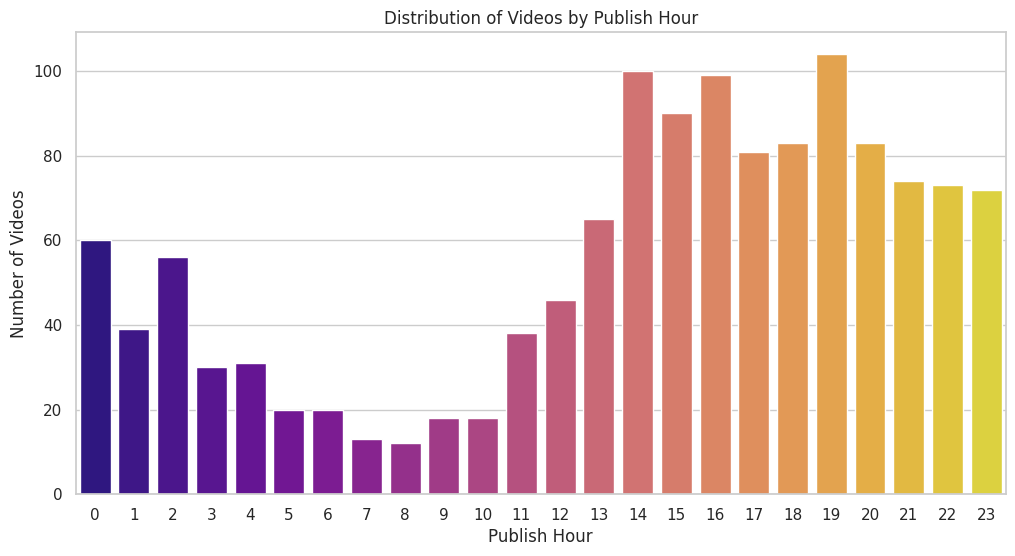

<ipython-input-14-47b2baa9e688>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'publish_day_of_week', data = youtube_data_cleaned, palette = 'coolwarm', width=0.3)


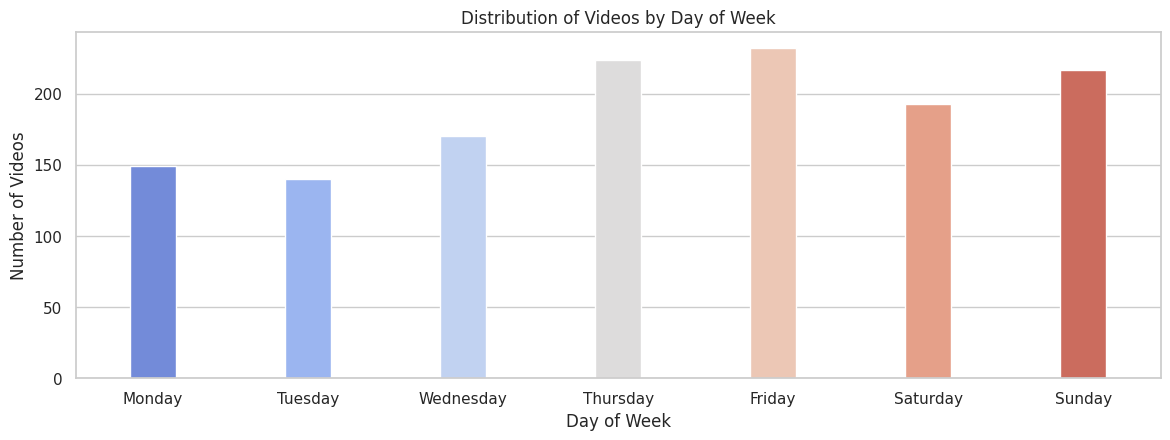

In [ ]:
# extract hour of publication
youtube_data_cleaned['published_at'] = pd.to_datetime(youtube_data_cleaned['published_at'])
youtube_data_cleaned['publish_hour'] = youtube_data_cleaned['published_at'].dt.hour
youtube_data_cleaned = youtube_data_cleaned.sort_values('published_at')

# bar chart for publish hour distribution
plt.figure(figsize=(12, 6))
sns.countplot(x='publish_hour', data=youtube_data_cleaned, palette='plasma')
plt.title('Distribution of Videos by Publish Hour')
plt.xlabel('Publish Hour')
plt.ylabel('Number of Videos')
plt.show()

# scatter plot for publish hour vs view count
youtube_data_cleaned['publish_day_of_week'] = youtube_data_cleaned['published_at'].dt.day_name()
plt.figure(figsize = (14,4.5))
sns.countplot(x = 'publish_day_of_week', data = youtube_data_cleaned, palette = 'coolwarm', width=0.3)
plt.title('Distribution of Videos by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Videos')
plt.show()

Videos are typically uploaded between 2 PM and 8 PM. Additionally, many videos are posted over the weekends when viewers have more time to engage. By combining these two charts, we can identify a prime time for increasing video interaction, which is between 2 PM and 8 PM on weekends.

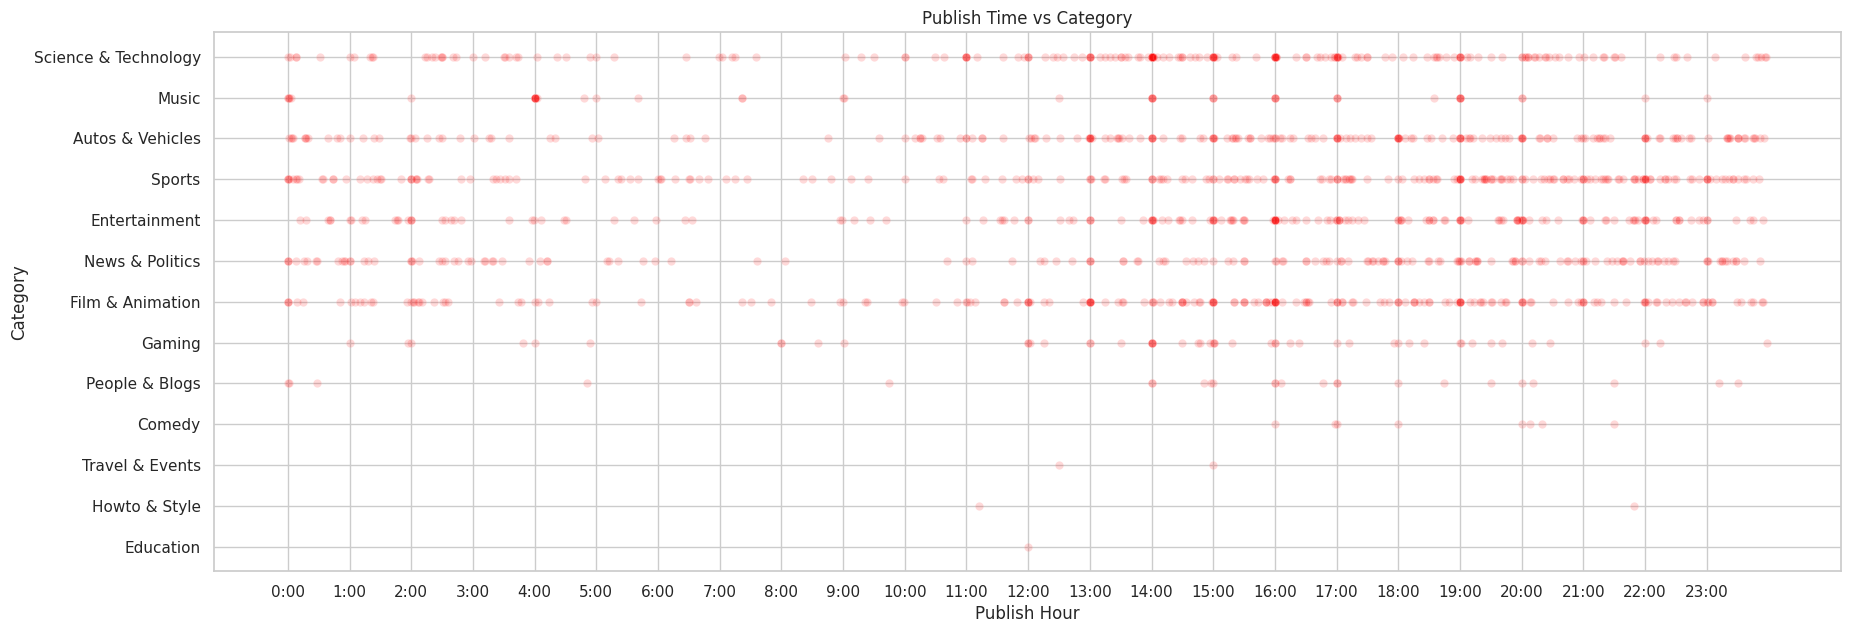

In [ ]:
youtube_data_cleaned['publish_minute'] = youtube_data_cleaned['published_at'].dt.minute
youtube_data_cleaned['publish_time'] = youtube_data_cleaned['publish_hour'] + youtube_data_cleaned['publish_minute'] / 60

plt.figure(figsize=(21, 7))
sns.scatterplot(x='publish_time', y='category', data=youtube_data_cleaned, alpha=0.15, color='red')
plt.xticks(ticks=range(24), labels=[f'{i}:00' for i in range(24)])
plt.title('Publish Time vs Category')
plt.xlabel('Publish Hour')
plt.ylabel('Category')
plt.show()



In [ ]:
youtube_data_cleaned.to_csv('ytb_dt_visual.csv', index = False)

The "Sports" category is consistently uploaded from 12 AM to 11 PM, which can be attributed to the data collection period during the 2024 Olympics, resulting in continuous updates on sports news on YouTube.

The categories "Science & Technology," "Entertainment," "Film & Animation," and "Autos & Vehicles" see higher upload frequencies between 2 PM and evening. This timeframe aligns with when viewers are likely seeking relaxation and entertainment after work or school.

The "News & Politics" category is predominantly uploaded from 5 PM to 10 PM, which corresponds with when viewers are likely to catch up on current events.

# Conclusion

* To increase views and engagement, videos are currently trending towards being released in the form of short videos with a duration of under 5 minutes.
* Publishing videos during the time slots between 2 PM and 8 PM on weekends can maximize views and engagement.
* Viewer-preferred categories such as "Sports," "Entertainment," "News & Politics," "Film & Animation," "Science & Technology," and "Autos & Vehicles" are more likely to trend and achieve high engagement.



